In [1]:
%matplotlib inline
from database import Database
from COCOOrganizer import COCOOrganizer as coco
import numpy as np
import gradio as gr

10000 annotations processed
20000 annotations processed
Top Image IDs: ['image_7', 'image_4', 'image_0', 'image_3', 'image_9']


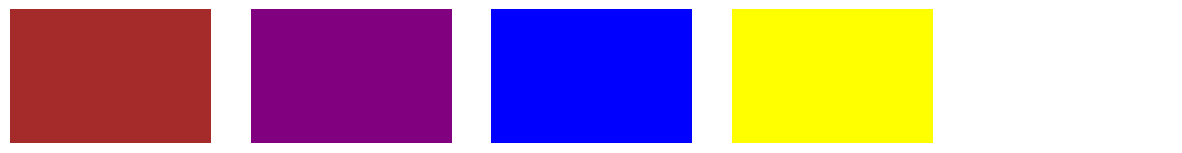

In [4]:
# Creating an instance of the Database class
db = Database()
coco_organizer = coco()

# Generating random descriptors and embedding matrices
num_images = 10
descriptor_dimensions = 512
embedding_dimensions = 200

descriptors, embedding_matrix = db.generate_random_descriptor_and_matrices(num_images, descriptor_dimensions, embedding_dimensions)
image_ids = [f"image_{i}" for i in range(num_images)]
image_urls = [f"https://placehold.co/600x400/{i}/{i}/png" for i in ['blue', 'green', 'red', 'yellow', 'purple', 'orange', 'pink', 'brown', 'black', 'white']]

# Converting descriptors to embeddings
embeddings = db.convert_to_embeddings(descriptors, embedding_matrix)

# Creating the image database
db.create_image_database(image_ids, embeddings)

# Saving the image database
database_filename = 'database.pkl'
db.save_image_database(database=db.image_embeddings, filename=database_filename)

# Loading the image database
loaded_image_database = db.load_image_database(database_filename)
db.image_embeddings = loaded_image_database

# Generating a random caption embedding for querying
caption_embedding = np.random.rand(embedding_dimensions)

# Querying the database
top_image_ids = db.query_database(caption_embedding, top_k=5)
print("Top Image IDs:", top_image_ids)

# Displaying the top images
top_image_urls = [image_urls[image_ids.index(id)] for id in top_image_ids]
db.display_images(image_urls=top_image_urls)

In [5]:
# Function to process uploaded image, find the closest caption, and display it
def process_image(image):
    image = Image.open(image).resize((224, 224))
    image_array = np.array(image).flatten()
    
    # In this example, we're using random data for the descriptor
    descriptor = np.random.rand(descriptor_dimensions)
    embedding = db.convert_to_embeddings(descriptor, embedding_matrix)
    
    top_image_ids = db.query_database(embedding, top_k=1)
    if top_image_ids:
        top_image_id = top_image_ids[0]
        caption_ids = coco_organizer.get_caption_id(top_image_id)
        if caption_ids:
            caption = coco_organizer.get_caption(caption_ids[0])
            return image, caption
    return image, "No caption found"

# Gradio Interface
iface = gr.Interface(
    fn=process_image,
    inputs=gr.components.Image(type="filepath", label="Upload Image"),
    outputs=[gr.components.Image(type="pil", label="Uploaded Image"), gr.components.Textbox(label="Caption")],
    title="Image Caption Retrieval System"
)

if __name__ == "__main__":
    iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://ce0f11f3dc6bb64fc7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "c:\Users\sgu07\anaconda3\envs\week3\lib\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "c:\Users\sgu07\anaconda3\envs\week3\lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "c:\Users\sgu07\anaconda3\envs\week3\lib\site-packages\gradio\blocks.py", line 1923, in process_api
    result = await self.call_function(
  File "c:\Users\sgu07\anaconda3\envs\week3\lib\site-packages\gradio\blocks.py", line 1508, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "c:\Users\sgu07\anaconda3\envs\week3\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "c:\Users\sgu07\anaconda3\envs\week3\lib\site-packages\anyio\_backends\_asyncio.py", line 2134, in run_sync_in_worker_thread
    return await f